In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np

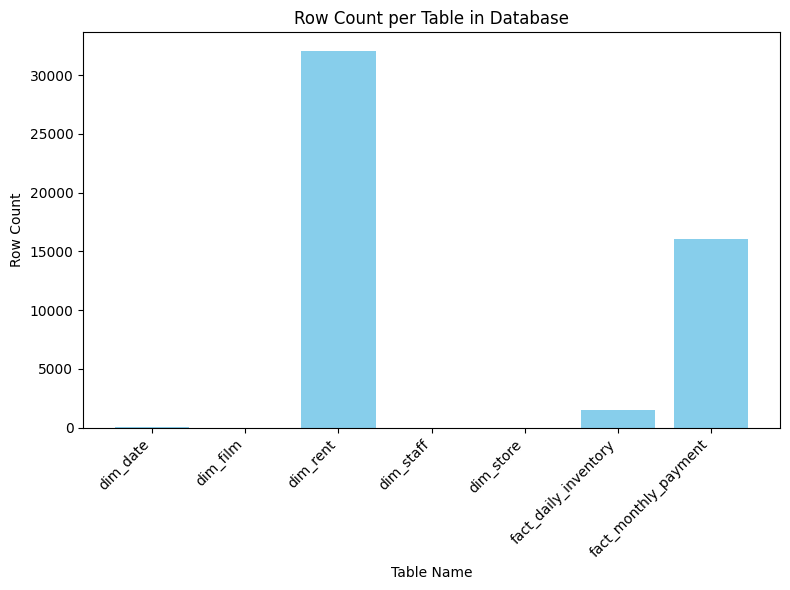

In [31]:

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="tareq123@",
    database="wh_project"
)

cursor = conn.cursor()

# Get all table names in the current database
cursor.execute("SHOW TABLES")
tables = [table[0] for table in cursor.fetchall()]

# For each table, get the row count
row_counts = []
for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM `{table}`")
    count = cursor.fetchone()[0]
    row_counts.append(count)

cursor.close()
conn.close()

# Plotting
x = np.arange(len(tables))
plt.figure(figsize=(8, 6))
plt.bar(x, row_counts, color='skyblue')
plt.xlabel('Table Name')
plt.ylabel('Row Count')
plt.title('Row Count per Table in Database')
plt.xticks(x, tables, rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="tareq123@",
    database="wh_project"
)

C:\Users\tsaym\AppData\Local\Temp\ipykernel_18672\1696743695.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\tsaym\AppData\Local\Temp\ipykernel_18672\1696743695.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="month_year", y="total_payment", palette="Blues_d")


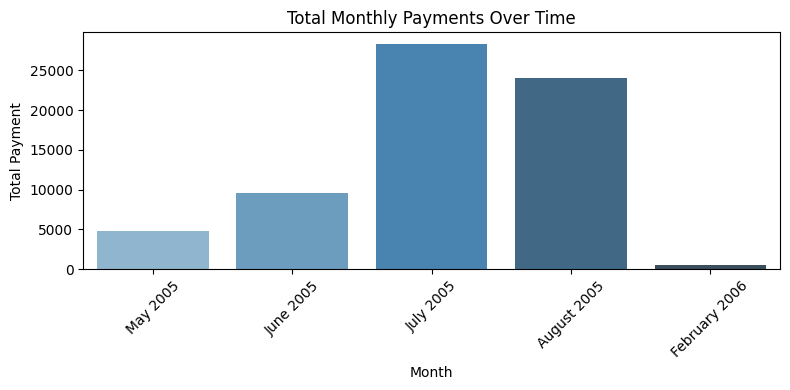

In [28]:
query = """
SELECT 
    CONCAT(month_name, ' ', year) AS month_year,
    SUM(payment_amount) AS total_payment
FROM fact_monthly_payment
GROUP BY year, month_name
ORDER BY year, FIELD(month_name, 'January', 'February', 'March', 'April', 'May', 'June', 
                     'July', 'August', 'September', 'October', 'November', 'December');
"""

df = pd.read_sql(query, conn)
conn.close()

# Plot
plt.figure(figsize=(8,4))
sns.barplot(data=df, x="month_year", y="total_payment", palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Total Monthly Payments Over Time")
plt.xlabel("Month")
plt.ylabel("Total Payment")
plt.tight_layout()
plt.show()

C:\Users\tsaym\AppData\Local\Temp\ipykernel_18672\4014084272.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\tsaym\AppData\Local\Temp\ipykernel_18672\4014084272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="staff_name", y="total_payment", palette="Greens_d")


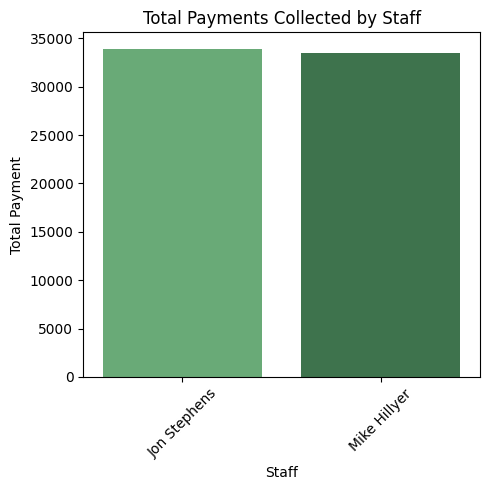

In [29]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="tareq123@",
    database="wh_project"
)

query = """
SELECT staff_name, SUM(payment_amount) AS total_payment
FROM fact_monthly_payment
GROUP BY staff_name
ORDER BY total_payment DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

# Plot
plt.figure(figsize=(5,5))
sns.barplot(data=df, x="staff_name", y="total_payment", palette="Greens_d")
plt.xticks(rotation=45)
plt.title("Total Payments Collected by Staff")
plt.xlabel("Staff")
plt.ylabel("Total Payment")
plt.tight_layout()
plt.show()
